# Absatzprognose 

## 0. Setup

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from pathlib import Path # Import für professionelles Pfad-Management

In [2]:
# Konfiguration

# Pfad
DATA_FOLDER = "Data"
FILE_NAME = "Absatz_und_Werbeausgaben_2012_bis_2022.xlsx"
DATA_FILE = Path(DATA_FOLDER) / FILE_NAME

# Parameter
RANDOM_STATE = 42 # Für reproduzierbare Ergebnisse

# Matplotlib-Plots direkt im Notebook anzeigen und Theme setzen
%matplotlib inline
sns.set_theme(style="whitegrid")

## 1. Daten Laden 

In [3]:
try:
    df = pd.read_excel(DATA_FILE)
    print(f"Daten erfolgreich geladen. {len(df)} Datensätze gefunden.")
except FileNotFoundError:
    print(f"FEHLER: Die Datei '{DATA_FILE}' wurde nicht gefunden. Bitte überprüfen Sie den Pfad.")
    df = None

Daten erfolgreich geladen. 132 Datensätze gefunden.


## 2. Zähler hinzufügen

In [32]:
# Add a counter column
df['Counter'] = df.index + 1 # +1 to start counting from 1 instead of 0
print(f"Counter-Spalten hinzugefügt: \n{df.columns}")

Counter-Spalten hinzugefügt: 
Index(['Monat', 'Absatz [Einheiten]', 'Werbeausgaben [€]', 'Counter',
       'Prognose Absatz [Einheiten]'],
      dtype='object')


## 3. Analyse mit Scatter Plot

Text(0, 0.5, 'Counter')

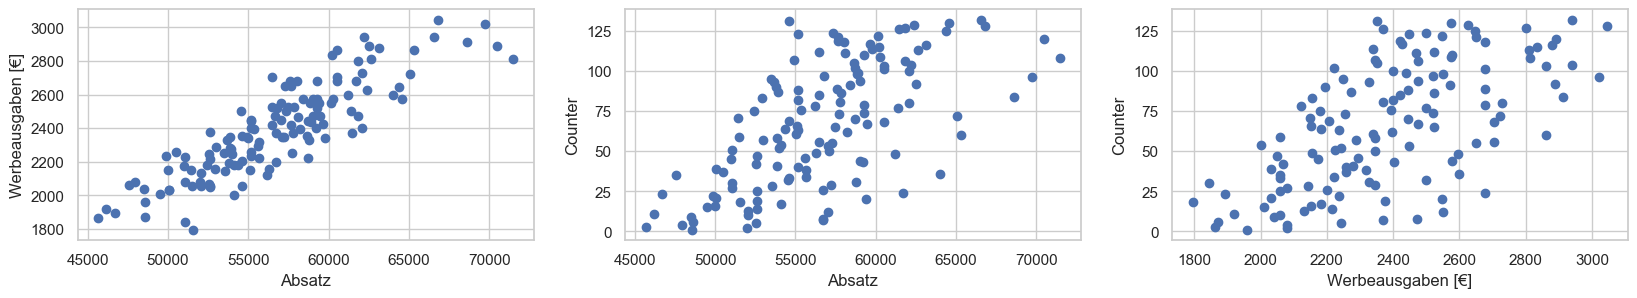

In [24]:
# Plots 
plt.figure(figsize=(20, 3))

plt.subplot(131)
plt.scatter('Absatz [Einheiten]' ,'Werbeausgaben [€]', data=df)
plt.xlabel('Absatz')
plt.ylabel('Werbeausgaben [€]')

plt.subplot(132)
plt.scatter('Absatz [Einheiten]' ,'Counter', data=df)
plt.xlabel('Absatz')
plt.ylabel('Counter')

plt.subplot(133)
plt.scatter('Werbeausgaben [€]' ,'Counter', data=df)
plt.xlabel('Werbeausgaben [€]')
plt.ylabel('Counter')

## 3. Werbeausgaben als unabhängige Variable definieren 

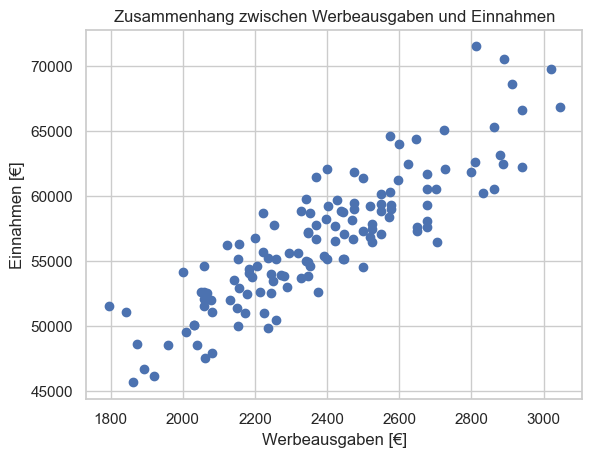

In [33]:
plt.scatter('Werbeausgaben [€]', 'Absatz [Einheiten]', data=df)
plt.title('Zusammenhang zwischen Werbeausgaben und Einnahmen')
plt.xlabel('Werbeausgaben [€]')
plt.ylabel('Einnahmen [€]')
plt.show()


## 4. Entfernen der Monat-Spalte 

In [7]:
# Berechnung der Korrelationen
correlation_werbeausgaben = df['Werbeausgaben [€]'].corr(df['Absatz [Einheiten]'])
correlation_monat = df['Monat'].corr(df['Absatz [Einheiten]'])

print(f"Korrelation zwischen Werbeausgaben und Absatz: {correlation_werbeausgaben:.4f}")
print(f"Korrelation zwischen Monat und Absatz: {correlation_monat:.4f}")

if abs(correlation_werbeausgaben) > abs(correlation_monat):
    print("Werbeausgaben ist die geeignetere unabhängige Variable, da die Korrelation mit dem Absatz stärker ist.")
else:
    print("Monat ist die geeignetere unabhängige Variable, da die Korrelation mit dem Absatz stärker ist.")

Korrelation zwischen Werbeausgaben und Absatz: 0.8708
Korrelation zwischen Monat und Absatz: 0.6375
Werbeausgaben ist die geeignetere unabhängige Variable, da die Korrelation mit dem Absatz stärker ist.


## 5. Training 

In [8]:
# Eingangs- und Zielvariable festlegen
X = df[['Werbeausgaben [€]']]  
y = df['Absatz [Einheiten]']   

# Für Regressionsanalysen werden alle Daten zum Training und zum Test herangezogen.
X_train, y_train = X, y
X_test, y_test = X, y

In [9]:
# Trainieren
model = LinearRegression()
model.fit(X, y)

# y = mx + c
slope = model.coef_[0]
intercept = model.intercept_

print("Steigung (Koeffizient):", slope)
print("Achsenabschnitt (Intercept):", intercept)

Steigung (Koeffizient): 15.916048952060294
Achsenabschnitt (Intercept): 18685.005012419206


## 6. Vorhersagen 

In [10]:
# Wende das trainierte Modell auf die Werbeausgaben an
df['Prognose Absatz [Einheiten]'] = model.predict(df[['Werbeausgaben [€]']])

vergleich = df[['Werbeausgaben [€]', 'Absatz [Einheiten]', 'Prognose Absatz [Einheiten]']]
print(vergleich.head())


   Werbeausgaben [€]  Absatz [Einheiten]  Prognose Absatz [Einheiten]
0               1960               48548                 49880.460958
1               2079               52006                 51774.470784
2               1862               45671                 48320.688161
3               2080               47925                 51790.386833
4               2244               52523                 54400.618861


## 7. Darstellen 

In [11]:
# Gerade erstellen 
x_values = np.array([df['Werbeausgaben [€]'].min(), df['Werbeausgaben [€]'].max()])         # Wertebereich festlegen 
y_values = slope * x_values + intercept                                                 # Funktion erstellen 

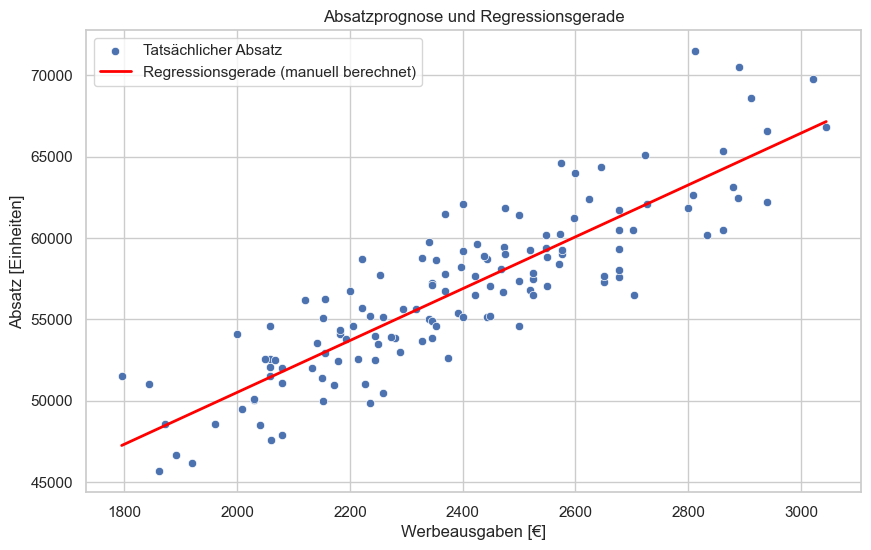

In [12]:
# Visualisierung der Regressionsgeraden mit den Originaldaten
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Werbeausgaben [€]', y='Absatz [Einheiten]', data=df, label='Tatsächlicher Absatz')    # Originaldaten
plt.plot(x_values, y_values, color='red', linewidth=2, label='Regressionsgerade (manuell berechnet)')   # Regressionsgerade

plt.title('Absatzprognose und Regressionsgerade')
plt.xlabel('Werbeausgaben [€]')
plt.ylabel('Absatz [Einheiten]')
plt.grid(True)
plt.legend()

plt.show()

## 8. Kennzahlen 

In [13]:
# Vorhersagen auf den gesamten Daten machen
y_pred = model.predict(X)

# R-Quadrat (R²)
r2 = r2_score(y, y_pred)
print(f"R-Quadrat (R²): {r2:.4f}")

# Berechne das angepasste R-Quadrat (Adjusted R²)
n = len(y) # Anzahl der Beobachtungen
p = X.shape[1] # Anzahl der Prädiktoren

# Sicherstellen, dass n - p - 1 nicht Null oder negativ ist
if n - p - 1 > 0:
    adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
    print(f"Angepasstes R-Quadrat (Adjusted R²): {adjusted_r2:.4f}")
else:
    print("Angepasstes R-Quadrat (Adjusted R²): Nicht berechenbar (zu wenige Daten oder zu viele Prädiktoren)")

# Mittlerer Absoluter Fehler (MAE)
mae = mean_absolute_error(y, y_pred)
print(f"Mittlerer Absoluter Fehler (MAE): {mae:.2f}")

# Mittlerer Quadratischer Fehler (MSE)
# Der Durchschnitt der quadrierten Differenzen. Größere Fehler werden stärker bestraft.
mse = mean_squared_error(y, y_pred)
print(f"Mittlerer Quadratischer Fehler (MSE): {mse:.2f}")

# Wurzel des Mittleren Quadratischen Fehlers (RMSE)
rmse = np.sqrt(mse)
print(f"Wurzel des Mittleren Quadratischen Fehlers (RMSE): {rmse:.2f}")

R-Quadrat (R²): 0.7583
Angepasstes R-Quadrat (Adjusted R²): 0.7565
Mittlerer Absoluter Fehler (MAE): 1982.56
Mittlerer Quadratischer Fehler (MSE): 6082244.43
Wurzel des Mittleren Quadratischen Fehlers (RMSE): 2466.22


## 9. Vergleich der Vorhersage und der Echten Daten

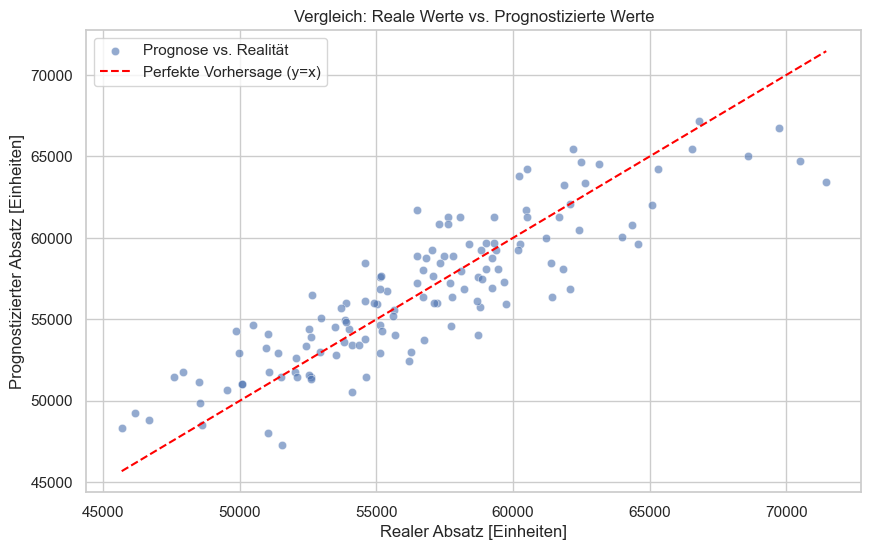

In [14]:
plt.figure(figsize=(10, 6))

# Reale Werte auf der X-Achse, Prognose auf der Y-Achse
sns.scatterplot(x='Absatz [Einheiten]', y='Prognose Absatz [Einheiten]', data=df, alpha=0.6, label='Prognose vs. Realität')

# Referenzlinie (perfekte Vorhersage: y = x)
min_val = min(df['Absatz [Einheiten]'].min(), df['Prognose Absatz [Einheiten]'].min())
max_val = max(df['Absatz [Einheiten]'].max(), df['Prognose Absatz [Einheiten]'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfekte Vorhersage (y=x)')

plt.title('Vergleich: Reale Werte vs. Prognostizierte Werte')
plt.xlabel('Realer Absatz [Einheiten]')
plt.ylabel('Prognostizierter Absatz [Einheiten]')
plt.grid(True)
plt.legend()

# Setzen der Achsengrenzen (Domain bounds)
# Wir fügen einen kleinen Puffer hinzu, damit die Punkte am Rand nicht abgeschnitten werden.
buffer = (max_val - min_val) * 0.05 # 5% Puffer
plt.xlim(min_val - buffer, max_val + buffer)
plt.ylim(min_val - buffer, max_val + buffer)

plt.show()

## 10. Weitere Kennzahlen für den Vergleich 

In [15]:
# Die .describe()-Methode berechnet automatisch viele nützliche statistische Kennzahlen.
statistik_vergleich = df[['Absatz [Einheiten]', 'Prognose Absatz [Einheiten]']].describe()

print("Statistischer Vergleich von realem Absatz und Prognose:")
print(statistik_vergleich)

Statistischer Vergleich von realem Absatz und Prognose:
       Absatz [Einheiten]  Prognose Absatz [Einheiten]
count          132.000000                   132.000000
mean         56682.401515                 56682.401515
std           5035.729096                  4385.190275
min          45671.000000                 47254.312881
25%          53357.000000                 53429.739875
50%          56700.000000                 56390.124980
75%          59384.750000                 59613.124893
max          71467.000000                 67149.374071
